# Week4授業課題 信用情報の学習

## 【問題1】コンペティション内容の確認

コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

* 何を学習し、何を予測するのか
* どのようなファイルを作りKaggleに提出するか
* 提出されたものはどういった指標値で評価されるのか

## 【解答】
* 何を学習し、何を予測するのか
    
    * 学習するもの：application_train.csv
    * 予測するもの：SK_ID_CURRごとのTARGET(0:ローン完済, 1:ローン未完済)
    * 評価方法：ROC AUC or F1で評価
    
予測値と観測地の間、ROC(Receiver operating characteristic)カーブ内側の面積を解明
The true positive rate versus the false positive rate (between 0-1)

## 【問題2】学習と検証

1. データを簡単に分析、前処理する。
2. 学習、検証するまでの一連の流れを作成・実行する。


* 検証にはこのコンペティションで使用される評価指標を用いるようにする。
* 学習に用いる手法は指定しない。

＜[参照元](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction)＞

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


## 前処理

In [2]:
app_train = pd.read_csv('../../application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Testing data features
app_test = pd.read_csv('../../application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis (EDA): 傾向、異常、様式、関係をデータから見抜く
* An open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationship within the data.
* The goal of EDA is to learn what our data can tell us.
* It generally starts out with a high level overview, then narrows in to specific areas.


Target: 
* The target is what we are asked to predict: either 0 (repaid) or 1 (not repaid).

In [4]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

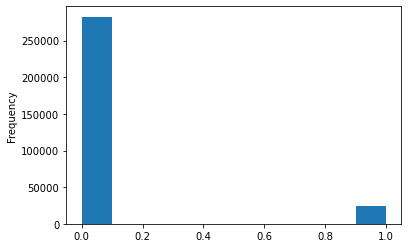

In [5]:
app_train['TARGET'].astype(int).plot.hist();

* The above information is an imbalanced class problem.
    * There are far more loans that were repaid on time.
    * We can 'weight the classes' by their representation in the data to reflect this imbalance.
    
* 学習データからの目的変数内の割合を示した棒グラフである。
* 0: ローン返済済
* 1: ローン未返済


# 欠損値の算出
* Examine Missing Values
    * We need to look at the number and percentage of missing values in each column.
    * 欠損値の割合を算出する。

In [6]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Missing values statistics
# 欠損値の割合が高い上位20位

missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


* Filling these missing values are essential for our machine learning.
* 以下の方法を用いて、欠損値を補完する。
    * Imputation
    * XGBoost (Require no imputation)
    * Drop columns with a high percentage.

# objectをlabel/One-Hot 変換して数値化

* Check the number of unique entries in each of the object (categorical) columns.
    1. Categorical variables require encoding.
    2. For two choices: label encoding.
    3. For more than two choices: One-Hot Encoding.
        * One-Hot Encoding may expand the number of features with many categories.
        * The above problem could be avoidable using PCA or other dimentionality reduction methods.

In [8]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [9]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [10]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### 【考察】

* 上記の.shapeから分かる通り、学習用データフレームは目的変数のTargetを含む240種の特徴量を有する。
* 検証用のデータフレームは目的変数を除いた239種の特徴量となる。
* いずれもobjectデータを数値に置き換えたため、特徴量が122種から増えている。

In [11]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


# Skipping anomalies（異常値の排除）

In [12]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

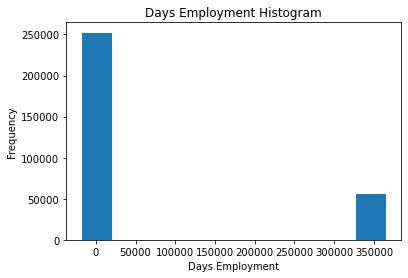

In [13]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

* 特徴量'DAYS_EMPLOYED'の異常値のせいで、最大値(max)が1000年を超えている。
* 次は最大値(max; 365243）を特徴量とする目的変数の割合を算出する。

In [14]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


* 学習用データ全体の5.40%がDAYS_EMPLOYEDを異常値として認識したが、8.66%が非異常値として算出したため、異常値をnp.nanに置換する。

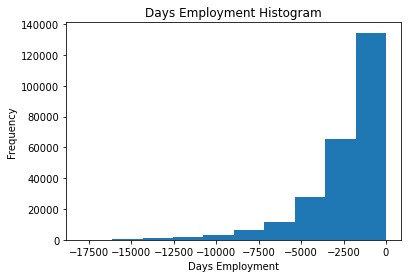

In [15]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [16]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


* 異常値の排除の後、目的変数に対して、全ての説明変数との相関性をcorr()を用いて算出する。
* 正と負の両方から上位15位を選出する。

In [17]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [18]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

* Target x DAYS_BIRTH
    * corr()は正の相関で最大であるが、実際の値は負数である。
    * As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.
    * つまり、クライアントの年齢が高い程、債務不履行に陥る可能性は低くなる。（目的変数が0になりやすい）
    * そのため、以下の算出、絶対値を用いて、再度、Target x DAYS_BIRTHの相関を求める。

In [19]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

* 上記の通り、負の相関になったので、
    * クライアントの年齢が高いほど、目的変数とは反比例の関係となる。
    * つまり、年齢層が高いほど、目的変数は0、返済能力が高くなる。

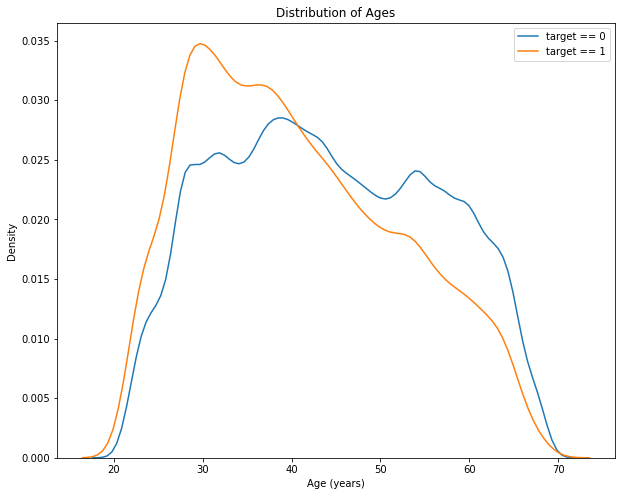

In [20]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

* 上記の可視化図の通り、年齢層が高い程、target==0の割合が高くなる。

In [39]:
# Make a new dataframe for polynomial features
# poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
# poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
type(app_train)

pandas.core.frame.DataFrame

In [113]:
# imputer for handling missing values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


## 学習・予測（ロジスティック回帰）

In [124]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
# train_labelsは学習用の目的変数
log_reg.fit(train, train_labels)

# Make predictions
# Make sure to select the second column only
# predict.probaを用いて2列のカラムが返される。
# 2列目が1の有無を返す。（債務不履行の予測値を算出するため）
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
# 提出用のフォーマットを作成
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


## 検証・可視化

In [125]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = train_labels[:len(log_reg_pred)].to_numpy()
y_score = log_reg_pred

fpr, tpr, thresholds = roc_curve(y_true, y_score)

print("FPR（偽陽性率）：{}".format(fpr))

print("TPR（真陽性率）：{}".format(tpr))

print("閾値：{}".format(thresholds))

FPR（偽陽性率）：[0.00000000e+00 2.23129616e-05 8.70205502e-04 ... 9.99888435e-01
 1.00000000e+00 1.00000000e+00]
TPR（真陽性率）：[0.         0.         0.         ... 0.99974535 0.99974535 1.        ]
閾値：[1.20095448 0.20095448 0.17578946 ... 0.04051693 0.03714065 0.03646365]


* ROC曲線とはfprを横軸、tprを縦軸にプロットしたもの。
    * fpr（偽陽性率）は陰性を間違って陽性と判定した割合
        * 小さい方が良い
    * tpr（真陽性率）は陽性を正しく陽性と判定した割合
        * 大きいほうが良い
* ROC曲線の見方
    * 理想的な予測（分類）ができていると(FPR, TPR) = (0, 1)（左上の点）を通る
    * 理想的な予測からずれると(FPR, TPR) = (0, 1)（左上の点）から離れていく

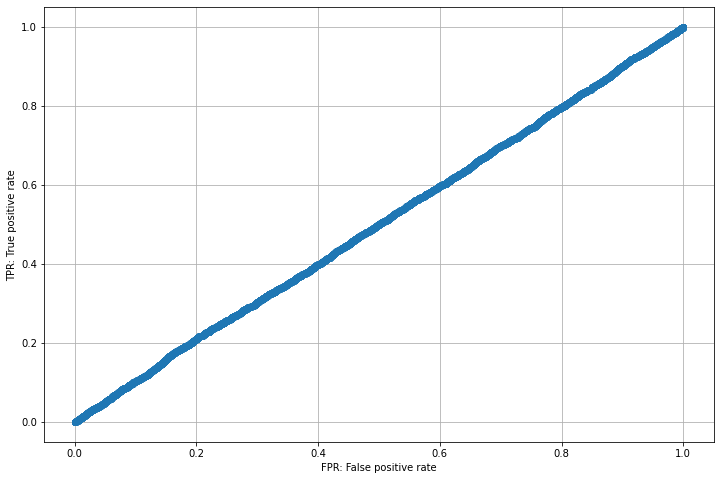

In [126]:
%matplotlib inline

fig, axes = plt.subplots(figsize = (12, 8))

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

### 【考察】

* 可視化すると分類の性能が悪いことが一目瞭然となる。
* 原因（予想）
    * 全特徴量（サンプル数が多い）を加味した場合からか。
    * 閾値の設定を任意にするべきだったか。

In [28]:
from sklearn.metrics import roc_auc_score

print("ROC-AUCスコア：約{:.3f}".format(roc_auc_score(y_true, y_score)))

ROC-AUCスコア：約0.500


### 【考察】

* 指標値が0.5に近いため、まったく分類できていないと思われる。

## 【問題3】テストデータに対する推定

* テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。

In [29]:
# Save the submission to a csv file
# 以下でcsvファイルを作成する。
submit.to_csv('log_reg_baseline.csv', index = False)

## 【問題4】特徴量エンジニアリング

精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

* どの特徴量を使うか
* どう前処理をするか
* 何をした時に検証データに対する評価指標がどのようになったかをまとめてください。
* 最低5パターンの学習・検証を行ってください。
* 精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

## 【考察】

* どの特徴量を使うか
    * 相関係数から上位5種を選出
* どう前処理をするか
    * objectの数値化
    * 異常値の排除
    * 欠損値の補完
* 何をした時に検証データに対する評価指標がどのようになったかをまとめてください。
* 最低5パターンの学習・検証を行ってください。（アルゴリズムより、特徴量に変化を入れるとよい）
    * ロジスティック回帰
        * 特徴量：EXT_SOURCE_1, EXT_SOURCE_2
        * 特徴量：EXT_SOURCE_2, EXT_SOURCE_3
        * 特徴量：EXT_SOURCE_1, EXT_SOURCE_3
        * 特徴量：EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3
        * 特徴量：DAYS_BIRTH, DAYS_EMPLOYED
* 精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

### 各パターン毎の特徴量を準備



In [130]:
# main dataframe
train # 学習データ_説明変数 (30751, 240)
train_labels # 学習データ_目標変数(307511, )
test # 検証データ_目標変数 (48744, 240)

# pattern_1
train_0 = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2']]
train_0 = train_0.fillna(train_0.mean())
train_0_target = app_train[['TARGET']]
test_0 = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2']]
test_0 = test_0.fillna(train_0.mean())

# pattern_2
train_1_raw = app_train[['EXT_SOURCE_2', 'EXT_SOURCE_3']]
train_1 = train_1.fillna(train_1.mean())
test_1 = app_test[['EXT_SOURCE_2', 'EXT_SOURCE_3']]
test_1 = test_1.fillna(train_1.mean())

# pattern_3
train_2 = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_3']]
train_2 = train_2.fillna(train_2.mean())
test_2 = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_3']]
test_2 = test_2.fillna(train_2.mean())

# pattern_4
train_3 = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
train_3 = train_3.fillna(train_3.mean())
test_3 = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
test_3 = test_3.fillna(train_3.mean())

# pattern_5
train_4 = app_train[['DAYS_BIRTH', 'DAYS_EMPLOYED']]
train_4 = train_4.fillna(train_4.mean())
test_4 = app_test[['DAYS_BIRTH', 'DAYS_EMPLOYED']]
test_4 = test_4.fillna(train_4.mean())


# Median imputation of missing values
# imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data

# imputer.fit(train_0)

# Transform both training and testing data
# train = imputer.transform(train)
# test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train_0)
train_0 = scaler.transform(train_0)
test_0 = scaler.transform(test_0)

### パターン1の学習・検証

In [138]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
# train_labelsは学習用の目的変数
log_reg.fit(train_0, train_labels)

# Make predictions
# Make sure to select the second column only
# predict.probaを用いて2列のカラムが返される。
# predict_probaは2列目が1の有無を返す。（債務不履行の予測値を算出するため）
log_reg_pred = log_reg.predict_proba(test_0)[:, 1]

# 検証
y_true = train_labels[:len(log_reg_pred)].to_numpy()
y_score = log_reg_pred

fpr, tpr, thresholds = roc_curve(y_true, y_score)
final_score = roc_auc_score(y_true, y_score)

print("FPR（偽陽性率）：{}".format(fpr))
print("TPR（真陽性率）：{}".format(tpr))
print("閾値：{}".format(thresholds))
print("ROC-AUCスコア：約{:.3f}".format(final_score))

FPR（偽陽性率）：[0.00000000e+00 2.23129616e-05 8.92518464e-05 ... 9.99910748e-01
 9.99910748e-01 1.00000000e+00]
TPR（真陽性率）：[0.         0.         0.         ... 0.99974535 1.         1.        ]
閾値：[1.09838205 0.09838205 0.09804923 ... 0.07121226 0.07109103 0.0709628 ]
ROC-AUCスコア：約0.503


In [139]:
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
# train_labelsは学習用の目的変数
log_reg.fit(train_1, train_labels)

# Make predictions
# Make sure to select the second column only
# predict.probaを用いて2列のカラムが返される。
# predict_probaは2列目が1の有無を返す。（債務不履行の予測値を算出するため）
log_reg_pred = log_reg.predict_proba(test_1)[:, 1]

# 検証
y_true = train_labels[:len(log_reg_pred)].to_numpy()
y_score = log_reg_pred

fpr, tpr, thresholds = roc_curve(y_true, y_score)
final_score = roc_auc_score(y_true, y_score)

print("FPR（偽陽性率）：{}".format(fpr))
print("TPR（真陽性率）：{}".format(tpr))
print("閾値：{}".format(thresholds))
print("ROC-AUCスコア：約{:.3f}".format(final_score))

FPR（偽陽性率）：[0.00000000e+00 2.23129616e-05 4.90885155e-04 ... 9.99642993e-01
 9.99642993e-01 1.00000000e+00]
TPR（真陽性率）：[0.         0.         0.         ... 0.99974535 1.         1.        ]
閾値：[1.09869053 0.09869053 0.09738784 ... 0.07144216 0.0714263  0.07053663]
ROC-AUCスコア：約0.503


In [140]:
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
# train_labelsは学習用の目的変数
log_reg.fit(train_2, train_labels)

# Make predictions
# Make sure to select the second column only
# predict.probaを用いて2列のカラムが返される。
# predict_probaは2列目が1の有無を返す。（債務不履行の予測値を算出するため）
log_reg_pred = log_reg.predict_proba(test_2)[:, 1]

# 検証
y_true = train_labels[:len(log_reg_pred)].to_numpy()
y_score = log_reg_pred

fpr, tpr, thresholds = roc_curve(y_true, y_score)
final_score = roc_auc_score(y_true, y_score)

print("FPR（偽陽性率）：{}".format(fpr))
print("TPR（真陽性率）：{}".format(tpr))
print("閾値：{}".format(thresholds))
print("ROC-AUCスコア：約{:.3f}".format(final_score))

FPR（偽陽性率）：[0.00000000e+00 0.00000000e+00 4.46259232e-04 ... 9.99866122e-01
 9.99866122e-01 1.00000000e+00]
TPR（真陽性率）：[0.00000000e+00 2.54647313e-04 2.54647313e-04 ... 9.99745353e-01
 1.00000000e+00 1.00000000e+00]
閾値：[1.09261564 0.09261564 0.09184001 ... 0.07300691 0.07300157 0.07238448]
ROC-AUCスコア：約0.499


In [141]:
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
# train_labelsは学習用の目的変数
log_reg.fit(train_3, train_labels)

# Make predictions
# Make sure to select the second column only
# predict.probaを用いて2列のカラムが返される。
# predict_probaは2列目が1の有無を返す。（債務不履行の予測値を算出するため）
log_reg_pred = log_reg.predict_proba(test_3)[:, 1]

# 検証
y_true = train_labels[:len(log_reg_pred)].to_numpy()
y_score = log_reg_pred

fpr, tpr, thresholds = roc_curve(y_true, y_score)
final_score = roc_auc_score(y_true, y_score)

print("FPR（偽陽性率）：{}".format(fpr))
print("TPR（真陽性率）：{}".format(tpr))
print("閾値：{}".format(thresholds))
print("ROC-AUCスコア：約{:.3f}".format(final_score))

FPR（偽陽性率）：[0.00000000e+00 2.23129616e-05 1.04870920e-03 ... 9.99285985e-01
 9.99285985e-01 1.00000000e+00]
TPR（真陽性率）：[0.         0.         0.         ... 0.99974535 1.         1.        ]
閾値：[1.10294771 0.10294771 0.09820156 ... 0.07016339 0.0701605  0.06919309]
ROC-AUCスコア：約0.502


In [142]:
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
# train_labelsは学習用の目的変数
log_reg.fit(train_4, train_labels)

# Make predictions
# Make sure to select the second column only
# predict.probaを用いて2列のカラムが返される。
# predict_probaは2列目が1の有無を返す。（債務不履行の予測値を算出するため）
log_reg_pred = log_reg.predict_proba(test_4)[:, 1]

# 検証
y_true = train_labels[:len(log_reg_pred)].to_numpy()
y_score = log_reg_pred

fpr, tpr, thresholds = roc_curve(y_true, y_score)
final_score = roc_auc_score(y_true, y_score)

print("FPR（偽陽性率）：{}".format(fpr))
print("TPR（真陽性率）：{}".format(tpr))
print("閾値：{}".format(thresholds))
print("ROC-AUCスコア：約{:.3f}".format(final_score))

FPR（偽陽性率）：[0.         0.         0.         ... 0.99988844 0.99988844 1.        ]
TPR（真陽性率）：[0.00000000e+00 2.54647313e-04 5.09294627e-04 ... 9.99745353e-01
 1.00000000e+00 1.00000000e+00]
閾値：[1.46696648 0.46696648 0.46372701 ... 0.10468985 0.10380383 0.09747849]
ROC-AUCスコア：約0.510


### 【考察】

* 結果として5番目のパターン（DAYS_BIRTH, DAYS_EMPLOYED）が他4つより相関性が高かった。
* 3つ目のパターン（'EXT_SOURCE_1', 'EXT_SOURCE_3'）のROC-AUCが0.50以下になったため、予測スコアを反転（1.0 - ROC-AUC）が必要と予測する。
* それでも、最も高いROC-AUCの数値が約0.510のため、特徴量の選択（それでも相関性が高い）が乏しいのか、前処理が不十分なのか、疑問が残る。